# Introduction to DDT analysis 

Let's just start this story by plotting a simple sine wave....


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def sinewave_plt(ss=25):
    # Define parameters
    wavelength = 50
    amplitude = 1
    start = 0
    end = 500 
    samples_per_wavelength = 50  # Increase for smoother curve

    pss=math.floor(samples_per_wavelength/ss)
    
    # Generate x and y values
    x = np.linspace(start, end, int((end - start) / wavelength * samples_per_wavelength)+1)
    y = amplitude * np.sin(2 * np.pi * x / wavelength)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 4))

    # Plot the sine wave
    ax.plot(x, y, label='Sine Wave')
    
    # Add points to the curve
    ax.plot(x[::pss], y[::pss], 'ro', markersize=8, label='Sample Points')  # Red circles, every 10th point

    # Create grid lines at integer x values
    #for i in x[::pss]:
    #    ax.axvline(x=i, color='lightgray', linestyle=':')
    
    # Customize plot appearance
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Sine Wave with Grid and Points')
    ax.legend()

    # Show the plot
    plt.tight_layout() # Prevents labels from being cut off
    plt.show()

sinewave_plt()

### Discussion

1) If we have 10 waves and 25 samples per wave, how many red points are required to prepresent the series?

2) If we instead represent the data as a sinewave how many numbers are required to represent the data?


So we can represent the data either in physical space, or in Fourrier space, that is, as a sum of sine waves, each described by its amplitude and phase.

Okay, this was for a single sinewave.  But what about other more generalized series and forms.  Well it turns out that any function in time (or space) can be represented by a sum of sinewaves.  (When Fourier first introduced this idea it was apparently rejected by many of the leading mathematicians of the idea for quite some time!)

The functions don't even need to be smooth (infinitely differentiable).  For example, it is possible to show that we can represent an ideal *square* wave with an amplitude of 1 as an infinite sum of sinusoidal waves:

$$f(t) = \frac{4}{\pi} \sum_{k=1}^{n} \frac{\sin((2k - 1)ft)}{2k - 1}$$

Where $f$ is the frequency in Hertz (cycles per second). The $2k-1$ term in the sine means only odd cycles are used, and the denominator factor is a scale factor. 

Let's try it out with a square wave of frequency of Hertz!

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def square_wave(t):
    """Generates a square wave."""
    return np.sign(np.sin(t))

def sum_of_sinusoids(t, num_terms):
    """Approximates a square wave using a sum of sinusoids."""
    approximation = np.zeros_like(t, dtype=float)
    for k in range(1, num_terms + 1):
        approximation += (4 / (np.pi * (2 * k - 1))) * np.sin((2 * k - 1) * t)
    return approximation

def plot_square_wave_approximation(time, square_signal, num_terms=1):
    """Plots the square wave and its sinusoidal approximation."""
    sinusoid_approximation = sum_of_sinusoids(time, num_terms)

    fig, ax = plt.subplots(1, 1, figsize=(12, 8)) # creates subplot with one panel

    ax.plot(time, square_signal, label='Square Wave')
    ax.plot(time, sinusoid_approximation, label=f'{num_terms} Terms Approximation')

    ax.set_title('Square Wave and Sinusoid Approximation')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.legend()
    ax.grid(True)
    plt.show()

### Exercise

With start with one term by default, but try increasing this and rerunning the following code...

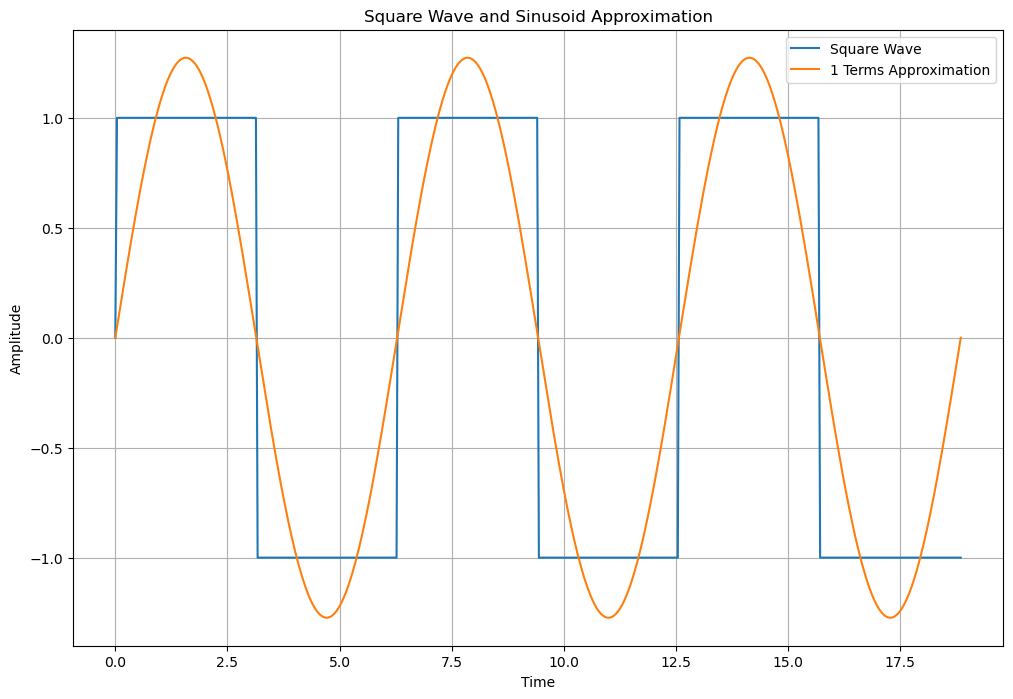

In [50]:
# Parameters
frequency = 1  # Frequency of the square wave
period = 2 * np.pi / frequency  # Period
time = np.linspace(0, 3 * period, 500)  # Time range for plotting

# Generate the square wave
square_signal = square_wave(time)

# Plot the square wave and its approximation
num_terms = 1  # Number of terms in the sinusoid approximation
plot_square_wave_approximation(time, square_signal, num_terms)

# Fourier Series

Let's imagine then any function at all that is periodic (later we will see this holds for non periodic signals).

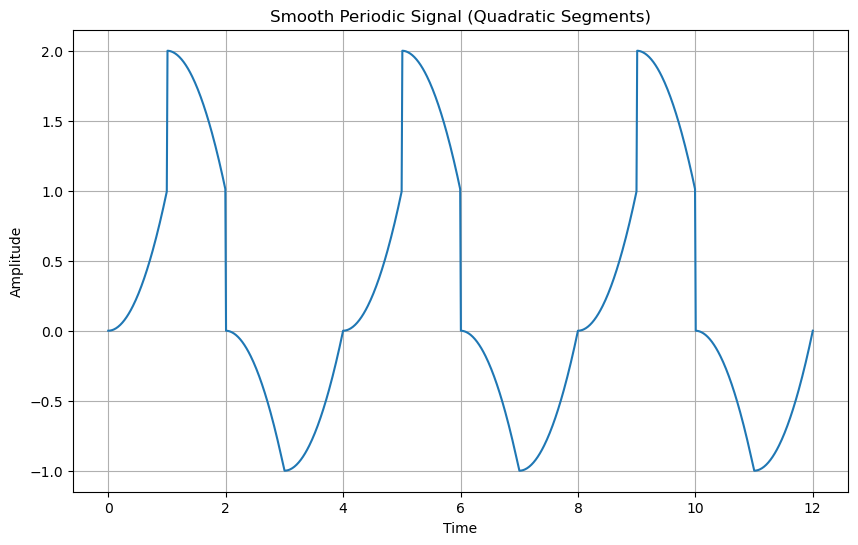

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def generate_smooth_periodic_signal_alt(t):
    """Generates a smooth periodic signal using different functions (no sin/cos, no noise)."""
    signal = np.zeros_like(t, dtype=float)
    for i, time_val in enumerate(t):
        phase = time_val % 4
        if 0 <= phase < 1:
            signal[i] = phase**2  # Quadratic rise
        elif 1 <= phase < 2:
            signal[i] = 2 - (phase - 1)**2  # Inverted quadratic peak
        elif 2 <= phase < 3:
            signal[i] = -(phase - 2)**2 # quadratic fall
        else:
            signal[i] = (phase-3)**2 - 1 # quadratic dip
    return signal

# Parameters
period = 4  # Period of the signal (for time range)
time = np.linspace(0, 12, 1000)  # Time range for plotting (3 periods)

# Generate the signal
smooth_periodic_signal = generate_smooth_periodic_signal_alt(time)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, smooth_periodic_signal)
plt.title("Smooth Periodic Signal (Quadratic Segments)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

Fourier determined that such a function can be represented as a series of sines and cosines of different frequencies, called a Fourier Series. 

There are two common forms of the Fourier Series, "Trigonometric" and "Exponential." These are discussed below, followed by a demonstration that the two forms are equivalent: 

Trigonometric Form (Sum of Sines and Cosines)
$$ x(t) = a_0 + \sum_{n=1}^{\infty} \left[ a_n \cos(n \omega_0 t) + b_n \sin(n \omega_0 t) \right] $$

Complex Exponential Form (Sum of Complex Numbers)
$$x(t) = \sum_{n=-\infty}^{\infty} c_n e^{j n \omega_0 t} $$

Where $\omega_0$ is the frequency of the periodic signal.  

So essentially Fourier suggested an incredible thing, that essentially we can represent any signal alternatively in a "frequency" (or wavelength) space, as a series of curves of a given wave length, we just need to find out how to calculate the amplitude (and phase) of each sinewave, essentially the coefficient $c_i$. This is useful because we may find that particular wavelengths/frequencies have much higher $c_i$ values, implying that this frequency is particularly pronounced in the signal, something that is not always immediately obvious when looking at the original signal in space or time $x(t)$.

While we will show an application in meteorology, Fourier transforms have found use in almost every field on the planet!  Here are just a couple of examples from betterexplained.com:

- **Earthquakes** If earthquake vibrations can be separated into "ingredients" (vibrations of different speeds & amplitudes), buildings can be designed to avoid interacting with the strongest ones.

- **Filters** If sound waves can be separated into ingredients (bass and treble frequencies), we can boost the parts we care about, and hide the ones we don't. The crackle of random noise can be removed. Maybe similar "sound recipes" can be compared (music recognition services compare recipes, not the raw audio clips).

- **Compression** If computer data can be represented with oscillating patterns, perhaps the least-important ones can be ignored. This "lossy compression" can drastically shrink file sizes (and why JPEG and MP3 files are much smaller than raw .bmp or .wav files).  Most compression methods in use these days use a related wavelet based approach.



## Discrete Fourier transform (DFT)

The DFT of a series of $n$ data points (where $n$ is typically assumed to be even for simplicity, though DFTs can be calculated for odd $n$) produces $n$ complex numbers. These complex numbers represent the frequency components of the signal.  Each complex number corresponds to a specific frequency. However, these frequency components aren't just sine waves. They represent both sine and cosine waves (or, equivalently, sine waves with phase shifts).

Let $x[n]$ represent a discrete-time signal, where $n$ is an integer index representing the time sample, and $n = 0, 1, ..., N-1$, with $N$ being the total number of samples. The Discrete Fourier Transform (DFT) of $x[n]$, denoted as $X[k]$, is defined as:

$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-j 2\pi k n/N}$$

where $k = 0, 1, ..., N-1$ represents the frequency index, and $j$ is the imaginary unit ($j^2 = -1$). The $e^{-j 2\pi kn/N}$ term represents a complex sinusoid at frequency $k/N$.  Essentially what we are doing is a **convolution** of the signal with the complex wave form, for each wavenumber. 

The DFT decomposes the signal $x[n]$ into a sum of complex sinusoids, each with a specific frequency and amplitude. The output $X[k]$ is a complex-valued sequence, where the magnitude $|X[k]|$ represents the amplitude of the frequency component $k/N$, and the phase $\arg(X[k])$ represents the phase shift of that component.

So to summarize, the amplitude spectrum of the signal is obtained by computing the magnitude $|X[k]|$ of the DFT coefficients and the power spectrum is given by $|X[k]|^2$.

The frequency corresponding to the $k$-th DFT coefficient is:

$$f_k = k \Delta f = \frac{k f_s}{N}$$

The inverse DFT (IDFT) reconstructs the original signal $x[n]$ from its DFT coefficients $X[k]$:

$$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{j 2\pi kn/N}$$

For a **real-valued input signal** $x[n]$, the DFT output $X[k]$ exhibits conjugate symmetry, i.e., $X[k] = X^*[N-k]$, where $*$ denotes complex conjugation. This means that the negative frequency components ($k > N/2$) are redundant, and we typically focus on the positive frequency components ($k \le N/2$).

### The Fast Fourier Transform (FFT) 

The FFT is an efficient algorithm to compute the DFT and IDFT. It leverages the symmetry and periodicity properties of the complex exponential term to reduce the computational complexity from $O(N^2)$ for the direct DFT calculation to $O(N \log N)$.



The frequency resolution $\Delta f$ of the DFT is given by:

$$\Delta f = \frac{f_s}{N}$$

where $f_s$ is the sampling frequency (the number of samples per unit time). The maximum frequency that can be represented without **aliasing** is the Nyquist frequency, which is half the sampling frequency:

$$f_{Nyquist} = \frac{f_s}{2}$$

We can illustrate this by returning to the first plot 

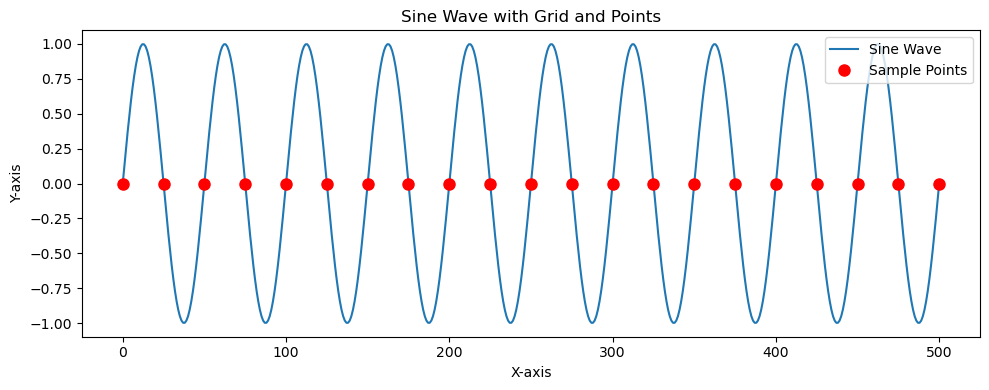

In [52]:
sinewave_plt(ss=2)

Essentially we need sampling at a rate of more than two points per wave.  

### Aliasing 

Aliasing occurs if we reduce the sample rate further:

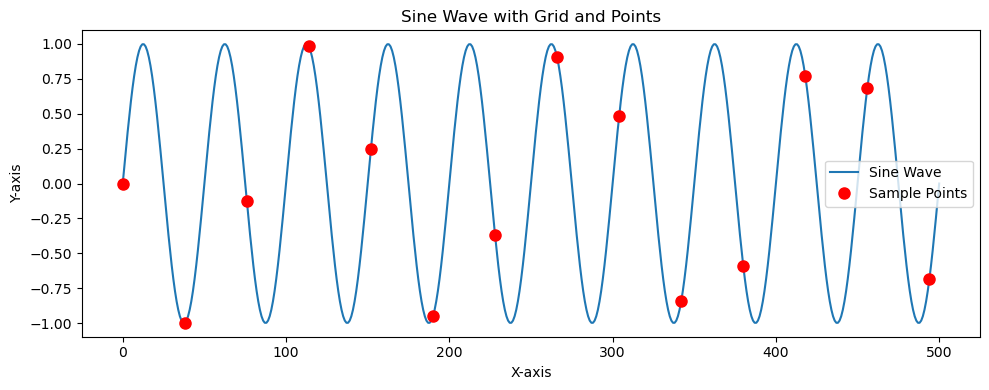

In [53]:
sinewave_plt(ss=1.3)

Here we see that at a slower rate, the red dots trace a wave that has a longer wavelength than the blue line. This is known as "aliasing" where the power at one frequency is artifically projected onto a lower frequency due to undersampling.

Okay, let's try an example. Here we will analysis an hourly temperature series for Trieste that spans about ten years.

In [54]:
#%pip install cftime

In [55]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import urllib.request
import cftime
import datetime

In [56]:
def analyze_time_series_fft(time_series, times, units):
    """
    Analyzes a time series using FFT and returns the frequencies, periods, and amplitudes.

    Args:
        time_series (np.ndarray or xr.DataArray): The time series data.
        time_coords (np.ndarray or xr.DataArray): Corresponding time coordinates.

    Returns:
        tuple: (frequencies, periods, amplitudes)
    """
   

    # Calculate the sampling period in days
    time_diffs = np.diff(times)
    if len(np.unique(time_diffs)) != 1:
        raise ValueError("Time coordinates must be evenly spaced.")

    # Determine time units and convert to days
    if isinstance(times[0], datetime.datetime):
        time_diff_days = np.mean([td.total_seconds() / (60 * 60 * 24) for td in time_diffs])
        print ("here")
    else:
        try:
            # units = time_coords.units
            print (units, " units")
            if 'second' in units.lower():
                print ("sec detected")
                time_diff_days = np.mean(time_diffs) / (60 * 60 * 24)
            elif 'minute' in units.lower():
                time_diff_days = np.mean(time_diffs) / (60 * 24)
            elif 'hour' in units.lower():
                print ("hours detected")
                time_diff_days = np.mean(time_diffs) / 24
            elif 'day' in units.lower():
                time_diff_days = np.mean(time_diffs)
            else:
                time_diff_days = np.mean(time_diffs) / (60 * 60 * 24)  # assume seconds if units not recognized.
        except AttributeError:
            time_diff_days = np.mean(time_diffs) / (60 * 60 * 24)  # assume seconds if no units attribute.

    # Compute the FFT
    fft_result = np.fft.fft(time_series)

    # Calculate frequencies (in cycles per day)
    frequencies = np.fft.fftfreq(len(time_series), time_diff_days)

    # Calculate periods (in days) - handle zero frequency carefully
    periods = np.zeros_like(frequencies)

    # we only take the positive frequencies as the 
    # input is a real function, not complex.
    positive_freq_indices = frequencies > 0
    periods[positive_freq_indices] = 1 / frequencies[positive_freq_indices]
    periods[frequencies == 0] = np.inf  # Period is infinite for zero frequency

    # Calculate amplitudes
    amplitudes = np.abs(fft_result)

    return frequencies, periods, amplitudes






We will also introduce a separate plotting routine in order to keep things clean


In [57]:

def plot_fft_spectrum(frequencies, periods, amplitudes):
    """
    Plots the frequency spectrum.

    Args:
        frequencies (np.ndarray): Frequencies (cycles/day).
        periods (np.ndarray): Periods (days).
        amplitudes (np.ndarray): Amplitudes.
    """

    positive_freq_indices = frequencies > 0

    fig, ax = plt.subplots(figsize=(10, 6))  # Create figure and axes

    ax.plot(periods[positive_freq_indices], amplitudes[positive_freq_indices])
    ax.set_xlabel("Period (days)")
    ax.set_ylabel("Amplitude (log scale)")
    ax.set_title("Frequency Spectrum")
    ax.grid(True)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(365 * 10,0.1)

    return fig,ax

decode
seconds since 1970-01-01  units
sec detected


Text(1, 1, 'day')

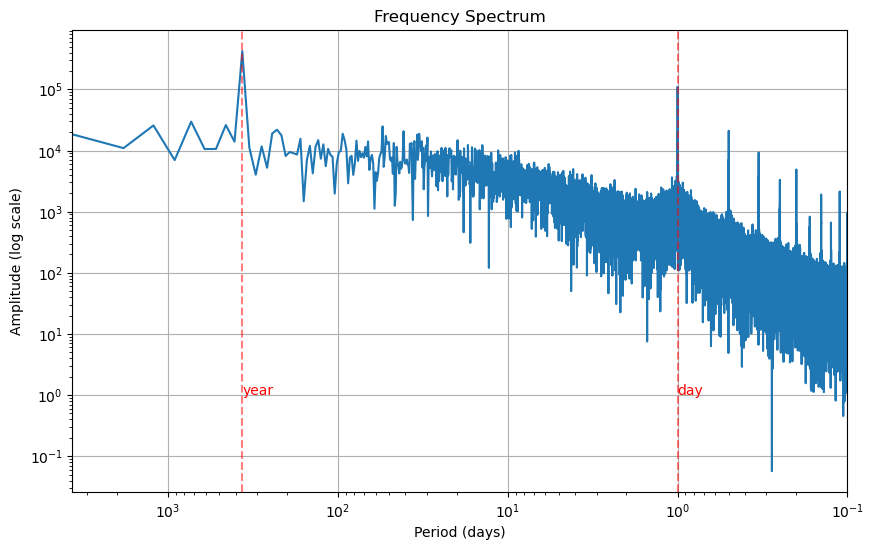

In [58]:

# Download example data
# url = "https://downloads.psl.noaa.gov/Datasets/era5/hourly/air.2m.2023.nc"
# filename = "air.2m.2023.nc"
# urllib.request.urlretrieve(url, filename)

datadir="/Users/tompkins/DATA/era5/hourly/"
filename=datadir+"t2m_t.nc"

# Open the NetCDF file
decode_times=False
ds = xr.open_dataset(filename, decode_times=decode_times)
if not decode_times:
    print ("decode")
    time_units = ds["valid_time"].units
    time_values = ds["valid_time"].values

    # Extract the base date from the time units
    base_date_str = time_units.split('since ')[1]

    # Convert seconds to datetime objects
    times = cftime.num2date(time_values, units = time_units, calendar = 'standard')

    # Replace the time coordinate
    # ds['time'] = datetimes

# Select a specific location and time range
lat = 45.6
lon = 13.7
t2m = ds["t2m"].sel(latitude=lat, longitude=lon,method='nearest')
# time = ds['time']

# Perform FFT analysis
frequencies, periods, amplitudes = analyze_time_series_fft(t2m, time_values, time_units)
fig,ax=plot_fft_spectrum(frequencies, periods, amplitudes)

ax.axvline(x=365, color='red', linestyle='--',alpha=0.5)
ax.text(365,1,"year",color='red')
ax.axvline(x=1, color='red', linestyle='--',alpha=0.5)
ax.text(1,1,"day",color='red')


### Discussion

- What do you notice about the general slope, what period general has more power?  This is an example of a **red** spectrum
- Do you notice any spectral peaks that stand out?  Are they there by chance do you think, or do they have physical significance?  Did you expect these peaks?
- What about the sub-daily peaks?

In [59]:
import numpy as np
from scipy.signal import savgol_filter

def calculate_significant_peaks_smoothed(amplitudes, window_length=15, polyorder=3, threshold_factor=2.0):
    """
    Calculates significant peaks by comparing amplitudes to a smoothed spectrum.

    Args:
        amplitudes (np.ndarray): The FFT amplitudes.
        window_length (int): Length of the smoothing window (must be odd).
        polyorder (int): Order of the polynomial used in smoothing.
        threshold_factor (float): Factor to multiply the smoothed amplitudes for threshold.

    Returns:
        np.ndarray: Boolean array indicating significant peaks.
    """

    # Smooth the amplitudes using Savitzky-Golay filter
    smoothed_amplitudes = savgol_filter(amplitudes, window_length, polyorder)

    # Calculate the significance threshold
    significance_threshold = smoothed_amplitudes * threshold_factor

    # Determine significant peaks
    significant_peaks = amplitudes > significance_threshold

    return significant_peaks

In [60]:
#sig_peaks=calculate_significant_peaks(amplitudes)
sig_peaks=calculate_significant_peaks_smoothed(amplitudes,threshold_factor=4)

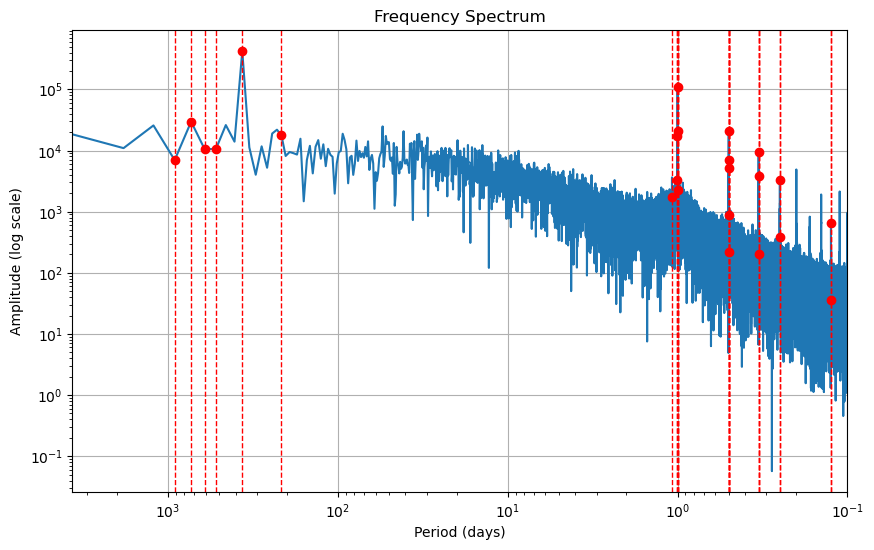

In [61]:
fig,ax=plot_fft_spectrum(frequencies, periods, amplitudes)

# Plot vertical lines at significant peaks
positive_freq_indices = frequencies > 0
peak_periods = periods[positive_freq_indices][sig_peaks[positive_freq_indices]]
peak_amplitudes = amplitudes[positive_freq_indices][sig_peaks[positive_freq_indices]]

for period, amplitude in zip(peak_periods, peak_amplitudes):
    ax.axvline(x=period, color='red', linestyle='--', linewidth=1) # add vertical lines
    ax.plot(period, amplitude, 'ro') # add red dot on peak
